# Audio Clustering

In [1]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@28fe037d212663c6a24f373b94cc5d478c8c1a1d timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

fatal: destination path 'ImageBind' already exists and is not an empty directory.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-req-build-y3h4pcwq
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-y3h4pcwq
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Preparing metadata (setup.py) ... done


In [2]:
!pip install librosa  # For audio analysis


In [3]:
audio_paths = ['/content/03-01-01-01-01-01-01.wav', 'p/content/03-01-01-01-01-02-01.wav', 'p/content/03-01-01-01-02-01-01.wav','/content/03-01-01-01-02-02-01.wav', '/content/03-01-02-01-01-01-01.wav']


In [4]:
%cd /content/ImageBind


/content/ImageBind


In [5]:
!ls /content/ImageBind


bpe		    CONTRIBUTING.md  ImageBind	model_card.md  requirements.txt
CODE_OF_CONDUCT.md  imagebind	     LICENSE	README.md      setup.py


In [6]:
import sys
sys.path.append('/content/ImageBind/containing/models')


In [7]:
%cd /content/ImageBind
from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

# Update this list with the paths to your audio files
audio_paths = ['/content/03-01-01-01-01-01-01.wav', '/content/03-01-01-01-01-02-01.wav', '/content/03-01-01-01-02-01-01.wav','/content/03-01-01-01-02-02-01.wav', '/content/03-01-02-01-01-01-01.wav', '/content/03-01-01-01-02-01-04.wav', '/content/03-01-01-01-02-02-01.wav', '/content/03-01-01-01-02-02-04.wav','/content/03-01-02-01-01-01-01.wav', '/content/03-01-02-01-01-01-04.wav', '/content/03-01-02-01-01-02-04.wav' ]


device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

# Load only audio data
inputs = {
    ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

# Process the embeddings as needed for your application


/content/ImageBind


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


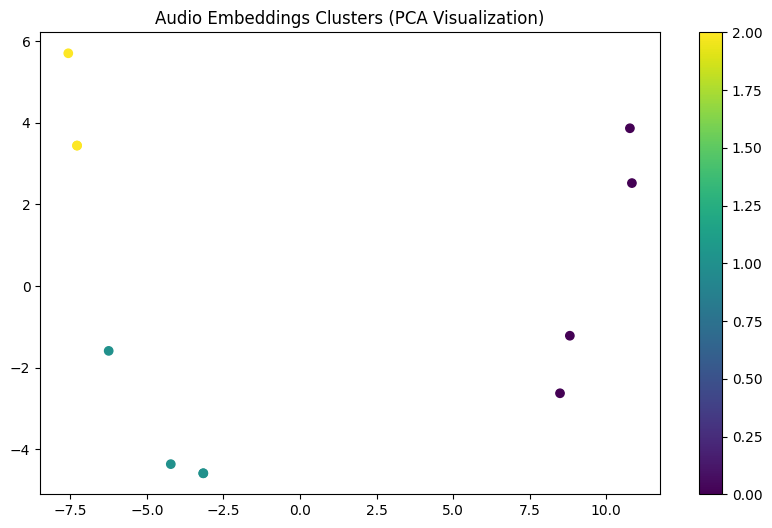

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of clusters (adjust as needed)
num_clusters = 3

# Move the audio embeddings to CPU
audio_embeddings = embeddings[ModalityType.AUDIO].cpu().numpy()

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(audio_embeddings)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(audio_embeddings)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Audio Embeddings Clusters (PCA Visualization)')
plt.colorbar()
plt.show()


# Explaining the graph:

The graph generated using PCA (Principal Component Analysis) visualization of audio embeddings clusters provides insights into how the audio embeddings are distributed in a lower-dimensional space. Here's an explanation of the graph:

Data Points: Each point on the graph represents an audio embedding from your dataset. These embeddings have been reduced to two dimensions (2D) for visualization purposes.

Colors: The points on the graph are color-coded based on their cluster assignments. In your case, you performed K-Means clustering with num_clusters = 3, so the points are grouped into three clusters, and each cluster is assigned a unique color.

Cluster Separation: The separation between clusters in the graph indicates how distinct the audio embeddings are in different clusters. If clusters are well-separated, it suggests that the embeddings within each cluster are similar to each other, while being dissimilar to embeddings in other clusters.

Cluster Overlap: If you observe some overlap between clusters, it means that there may be similarities between the audio content represented by embeddings in those clusters.

Distribution: The distribution of points within each cluster can provide insights into the density and spread of audio embeddings. A more tightly clustered group of points indicates that the audio content within that cluster is relatively consistent.

Outliers: Points that are far from the main clusters may represent outliers or audio embeddings that are unique or distinct from the main groups.

